# Churn Predictor

Date: Septembrer, 2024.

### Importing the required libraries

In [ ]:
!pip install lazypredict

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lazypredict
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Load the data
Tha dataset contains information whether a customer will change telco provider. It is part of the Kaggle competition [Customer Churn Prediction](https://www.kaggle.com/competitions/customer-churn-prediction-2020). The dictionary of variables is the following:

- state, string: 2-letter code of the US state of customer residence
- account_length, numerical: Number of months the customer has been with the current telco provider
- area_code, string="area_code_AAA" where AAA = 3 digit area code.
- international_plan, (yes/no): The customer has international plan.
- voice_mail_plan, (yes/no): The customer has voice mail plan.
- number_vmail_messages, numerical: Number of voice-mail messages.
- total_day_minutes, numerical: Total minutes of day calls.
- total_day_calls, numerical: Total number of day calls.
- total_day_charge, numerical: Total charge of day calls.
- total_eve_minutes, numerical: Total minutes of evening calls.
- total_eve_calls, numerical: Total number of evening calls.
- total_eve_charge, numerical: Total charge of evening calls.
- total_night_minutes, numerical: Total minutes of night calls.
- total_night_calls, numerical: Total number of night calls.
- total_night_charge, numerical: Total charge of night calls.
- total_intl_minutes, numerical: Total minutes of international calls.
- total_intl_calls, numerical: Total number of international calls.
- total_intl_charge, numerical: Total charge of international calls
- number_customer_service_calls, numerical: Number of calls to customer service
- churn, (yes/no): Customer churn - target variable.


In [ ]:
df = pd.read_csv("churn_predictor.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


### Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Evaluate Missing Values

In [5]:
df.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


There are no missing values in any of the columns.

#### Evaluate Duplicate Values

In [6]:
df.duplicated().sum()

0

There are no duplicate values in any of the columns.

### Coding Categorical Variables

In [7]:
df['international_plan'].replace({'yes':1,'no':0},inplace=True)
df['voice_mail_plan'].replace({'yes':1,'no':0},inplace=True)
df['churn'].replace({'yes':1,'no':0},inplace=True)

<ipython-input-7-6d1f722f4c3f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['international_plan'].replace({'yes':1,'no':0},inplace=True)
<ipython-input-7-6d1f722f4c3f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['international_plan'].replace({'yes':1,'no':0},inplace=True)
<ipython-inp

In [8]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


Once the main categorical variables have been coded, we evaluate the variables as 'state'. It does not represent relevant information for the study, so we can proceed to eliminate it.

### Feature Engineering

#### Total minutes, calls and charges

In [9]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

In [10]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,625.2,332,59.24
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,539.4,333,62.29
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,564.8,255,66.80
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,512.0,359,52.09
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,...,118,9.57,7.5,7,2.03,3,0,786.8,321,78.31


#### Average minutes per call

In [11]:
df['avg_day_call_duration'] = df['total_day_minutes'] / df['total_day_calls']
df['avg_eve_call_duration'] = df['total_eve_minutes'] / df['total_eve_calls']
df['avg_night_call_duration'] = df['total_night_minutes'] / df['total_night_calls']
df['avg_intl_call_duration'] = df['total_intl_minutes'] / df['total_intl_calls']

In [12]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,...,3.70,1,0,625.2,332,59.24,1.313821,1.898058,2.469903,4.566667
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,3.29,0,0,539.4,333,62.29,2.135088,1.101818,1.563462,2.440000
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,1.78,2,0,564.8,255,66.80,4.216901,0.703409,2.212360,0.942857
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,2.73,3,0,512.0,359,52.09,1.475221,1.215574,1.544628,3.366667
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,...,2.03,3,0,786.8,321,78.31,2.479545,3.226852,1.801695,1.071429


#### Average monthly expense

In [13]:
df['monthly_avg_charge'] = df['total_charge'] / df['account_length']

In [14]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,monthly_avg_charge
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,...,1,0,625.2,332,59.24,1.313821,1.898058,2.469903,4.566667,0.553645
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,0,0,539.4,333,62.29,2.135088,1.101818,1.563462,2.440000,0.454672
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,2,0,564.8,255,66.80,4.216901,0.703409,2.212360,0.942857,0.795238
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,3,0,512.0,359,52.09,1.475221,1.215574,1.544628,3.366667,0.694533
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,...,3,0,786.8,321,78.31,2.479545,3.226852,1.801695,1.071429,0.647190


### Correlation Analysis

In [25]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

In [16]:
columns_to_analyze = numerical_features
correlation_matrix = df[columns_to_analyze].corr(method='pearson')

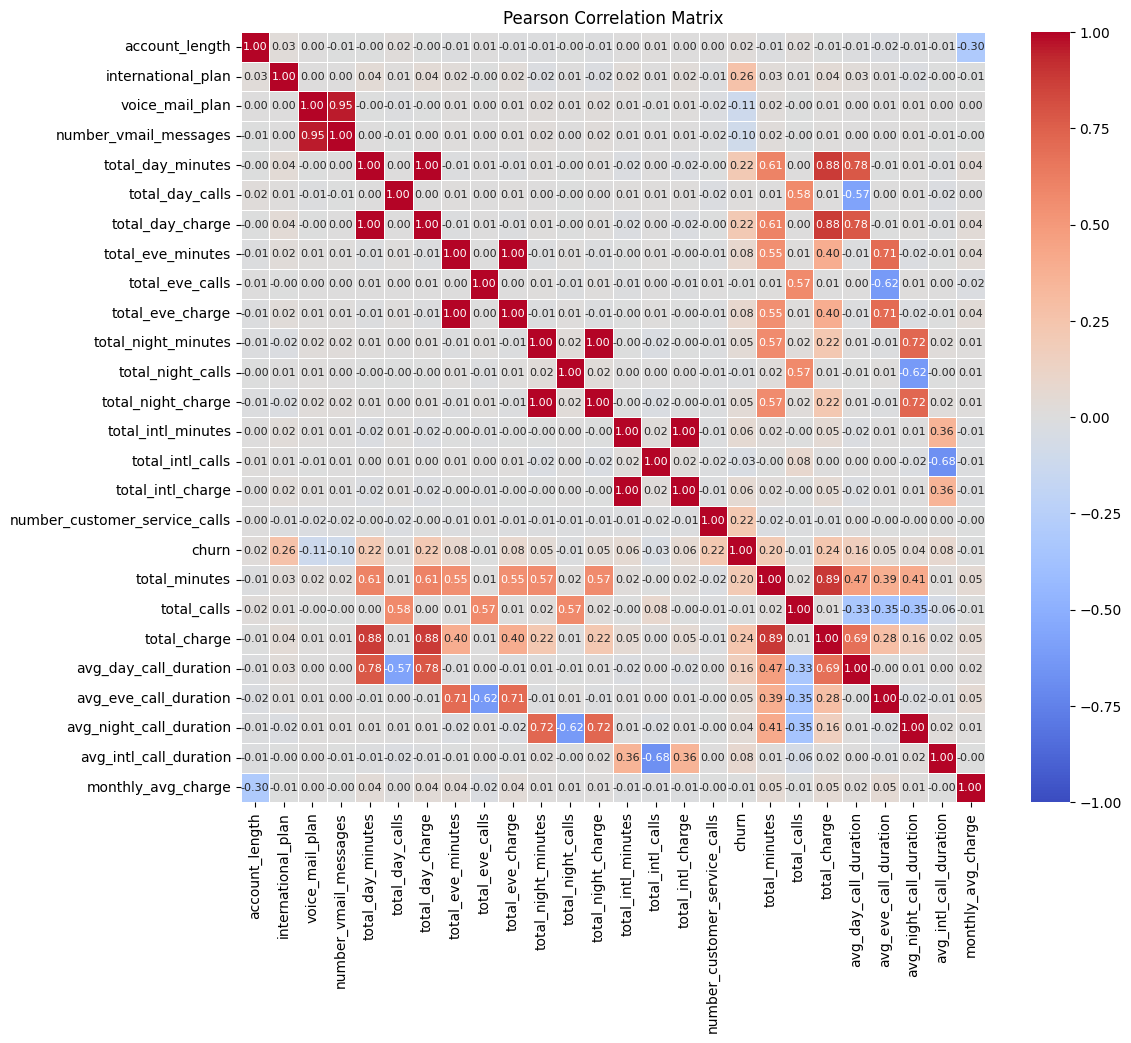

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1,
            annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

The following variables are highly correlated according to the matrix values:

- total_day_charge - total_day_minute
- total_eve_charge - total_eve_minute
- total_night_charge - total_night_minute
- total_intl_charge - total_intl_minute
- voice_mail_plan - number_vmail_messages

This is expected, since the relationship between call time and charge is generally given by a fixed rate multiplied by time of use. An interesting alternative to handle this case is to create new combined variables that capture the information from both minutes and charges columns. One can work with a per-minute charge ratio, which can provide information on the relative cost of calls.

In [18]:
df['day_charge_per_minute'] = df['total_day_charge'] / df['total_day_minutes']
df['eve_charge_per_minute'] = df['total_eve_charge'] / df['total_eve_minutes']
df['night_charge_per_minute'] = df['total_night_charge'] / df['total_night_minutes']
df['intl_charge_per_minute'] = df['total_intl_charge'] / df['total_intl_minutes']

In [19]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_charge,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,monthly_avg_charge,day_charge_per_minute,eve_charge_per_minute,night_charge_per_minute,intl_charge_per_minute
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,...,59.24,1.313821,1.898058,2.469903,4.566667,0.553645,0.169988,0.085013,0.045008,0.270073
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,62.29,2.135088,1.101818,1.563462,2.440000,0.454672,0.170008,0.084983,0.045018,0.269672
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,66.80,4.216901,0.703409,2.212360,0.942857,0.795238,0.170007,0.084976,0.044997,0.269697
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,52.09,1.475221,1.215574,1.544628,3.366667,0.694533,0.170006,0.085030,0.044997,0.270297
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,...,78.31,2.479545,3.226852,1.801695,1.071429,0.647190,0.169982,0.084993,0.045014,0.270667


With these modifications we can eliminate redundant variables without losing the essence of the information they contain.

In [22]:
df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge',
         'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], axis=1, inplace=True)

We also proceed to eliminate the variables 'state' and 'area_code' since they do not provide relevant information for this particular study.

In [20]:
df.drop(['state', 'area_code'], axis=1, inplace=True)

In [23]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,churn,...,total_charge,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,monthly_avg_charge,day_charge_per_minute,eve_charge_per_minute,night_charge_per_minute,intl_charge_per_minute
0,107,0,1,26,123,103,103,3,1,0,...,59.24,1.313821,1.898058,2.469903,4.566667,0.553645,0.169988,0.085013,0.045008,0.270073
1,137,0,0,0,114,110,104,5,0,0,...,62.29,2.135088,1.101818,1.563462,2.440000,0.454672,0.170008,0.084983,0.045018,0.269672
2,84,1,0,0,71,88,89,7,2,0,...,66.80,4.216901,0.703409,2.212360,0.942857,0.795238,0.170007,0.084976,0.044997,0.269697
3,75,1,0,0,113,122,121,3,3,0,...,52.09,1.475221,1.215574,1.544628,3.366667,0.694533,0.170006,0.085030,0.044997,0.270297
4,121,0,1,24,88,108,118,7,3,0,...,78.31,2.479545,3.226852,1.801695,1.071429,0.647190,0.169982,0.084993,0.045014,0.270667


### Scaling of Numerical Variables

Machine learning algorithms tend to perform best when the numerical variables are in a similar range. This is especially important if you plan to use distance-based models such as SVM or KNN.

In [26]:
numerical_features = numerical_features.drop('churn')  # Excludes the 'churn' column
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [27]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,churn,...,total_charge,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,monthly_avg_charge,day_charge_per_minute,eve_charge_per_minute,night_charge_per_minute,intl_charge_per_minute
0,0.170399,-0.320547,1.679864,1.366857,1.163449,0.141841,0.157309,-0.579164,-0.426346,0,...,-0.020614,-0.784100,-0.255773,0.520851,0.595349,-0.133552,-0.576113,0.690419,0.434226,0.046559
1,0.926186,-0.320547,-0.595286,-0.567911,0.710014,0.493490,0.207083,0.232927,-1.188960,0,...,0.274225,0.339322,-1.315110,-0.748152,-0.320082,-0.170768,0.192286,-1.067792,1.075018,-1.144085
2,-0.409038,3.119667,-0.595286,-0.567911,-1.456398,-0.611691,-0.539526,1.045017,0.336268,0,...,0.710201,3.187066,-1.845163,0.160295,-0.964533,-0.042706,0.134939,-1.531875,-0.195215,-1.070309
3,-0.635774,3.119667,-0.595286,-0.567911,0.659633,1.096316,1.053239,-0.579164,1.098882,0,...,-0.711794,-0.563319,-1.163767,-0.774518,0.078805,-0.080574,0.109520,1.744299,-0.203438,0.711996
4,0.523099,-0.320547,1.679864,1.218029,-0.599910,0.393019,0.903917,1.045017,1.098882,0,...,1.822855,0.810511,1.512085,-0.414629,-0.909189,-0.098376,-0.798335,-0.507839,0.812422,1.809897


### Visualizations

Relationship between variables related to 'charge_per_minute' and 'churn'.

<ipython-input-28-4a9b7fafb5f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='day_charge_per_minute', data=df, palette='Set2')
<ipython-input-28-4a9b7fafb5f1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='eve_charge_per_minute', data=df, palette='Set2')
<ipython-input-28-4a9b7fafb5f1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='night_charge_per_minute', data=df, palette='Set2')
<ipython-input-28-4a9b7fafb5f1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

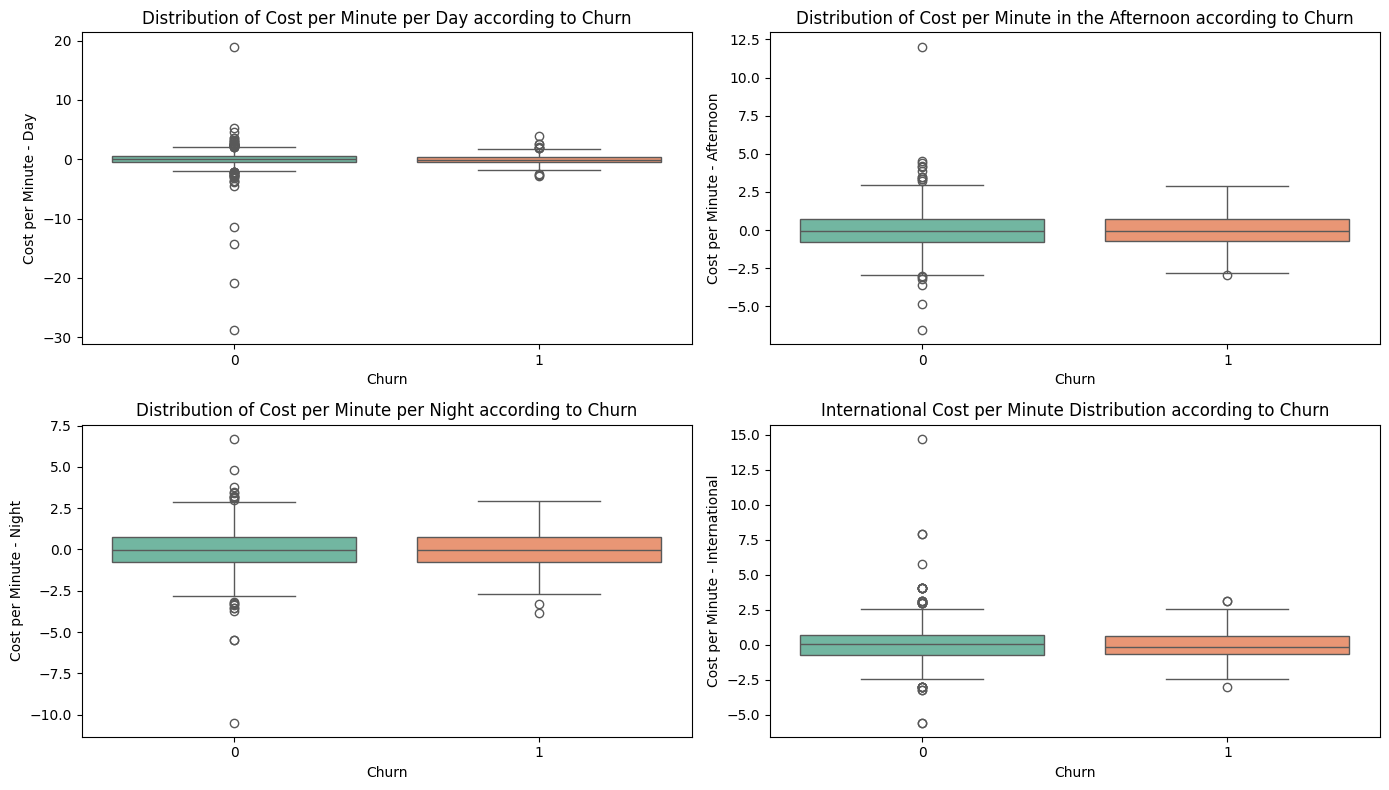

In [28]:
plt.figure(figsize=(14, 8))

#day_charge_per_minute
plt.subplot(2, 2, 1)
sns.boxplot(x='churn', y='day_charge_per_minute', data=df, palette='Set2')
plt.title("Distribution of Cost per Minute per Day according to Churn")
plt.xlabel("Churn")
plt.ylabel("Cost per Minute - Day")

#eve_charge_per_minute
plt.subplot(2, 2, 2)
sns.boxplot(x='churn', y='eve_charge_per_minute', data=df, palette='Set2')
plt.title("Distribution of Cost per Minute in the Afternoon according to Churn")
plt.xlabel("Churn")
plt.ylabel("Cost per Minute - Afternoon")

#night_charge_per_minute
plt.subplot(2, 2, 3)
sns.boxplot(x='churn', y='night_charge_per_minute', data=df, palette='Set2')
plt.title("Distribution of Cost per Minute per Night according to Churn")
plt.xlabel("Churn")
plt.ylabel("Cost per Minute - Night")

#intl_charge_per_minute
plt.subplot(2, 2, 4)
sns.boxplot(x='churn', y='intl_charge_per_minute', data=df, palette='Set2')
plt.title("International Cost per Minute Distribution according to Churn")
plt.xlabel("Churn")
plt.ylabel("Cost per Minute - International")

plt.tight_layout()
plt.show()

- **Distribution of Cost per Minute per Day by Churn:** Both groups (stayers and leavers) have a similar cost per minute per day, with a slight tendency to be higher in the leavers. Outliers (points outside the box) are more frequent in the departing group, suggesting greater variability in their costs.
- **Afternoon Cost per Minute Distribution by Churn:** Customers who leave tend to have a slightly higher cost per minute in the afternoons compared to those who stay. Again, there are more outliers in the departing group.
- **Distribution of Cost per Minute per Night according to Churn:** The trend is similar to the previous ones: departing customers have a slightly higher cost per minute, especially in the upper part of the distribution.
- **International Cost per Minute Distribution by Churn:** In international calls, the difference between the two groups is less marked. However, there is still a slight tendency towards higher costs for departing customers.

In general:
- Cost per minute appears to be related to a customer's decision to stay or leave. In general, customers who leave tend to have a slightly higher cost per minute, especially for daytime and evening calls.
- The variability in costs is higher among exiting customers. This suggests that there is a subset of exiting customers who have significantly higher costs.
- International calls seem to be less decisive in the decision to leave. The difference in costs between the two groups is less pronounced in this case.

Relationship between variables related to 'call_duration' and 'churn'.

<ipython-input-29-56973f14aa63>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='avg_day_call_duration', data=df, palette='Blues')
<ipython-input-29-56973f14aa63>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='avg_eve_call_duration', data=df, palette='Blues')
<ipython-input-29-56973f14aa63>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='avg_night_call_duration', data=df, palette='Blues')
<ipython-input-29-56973f14aa63>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

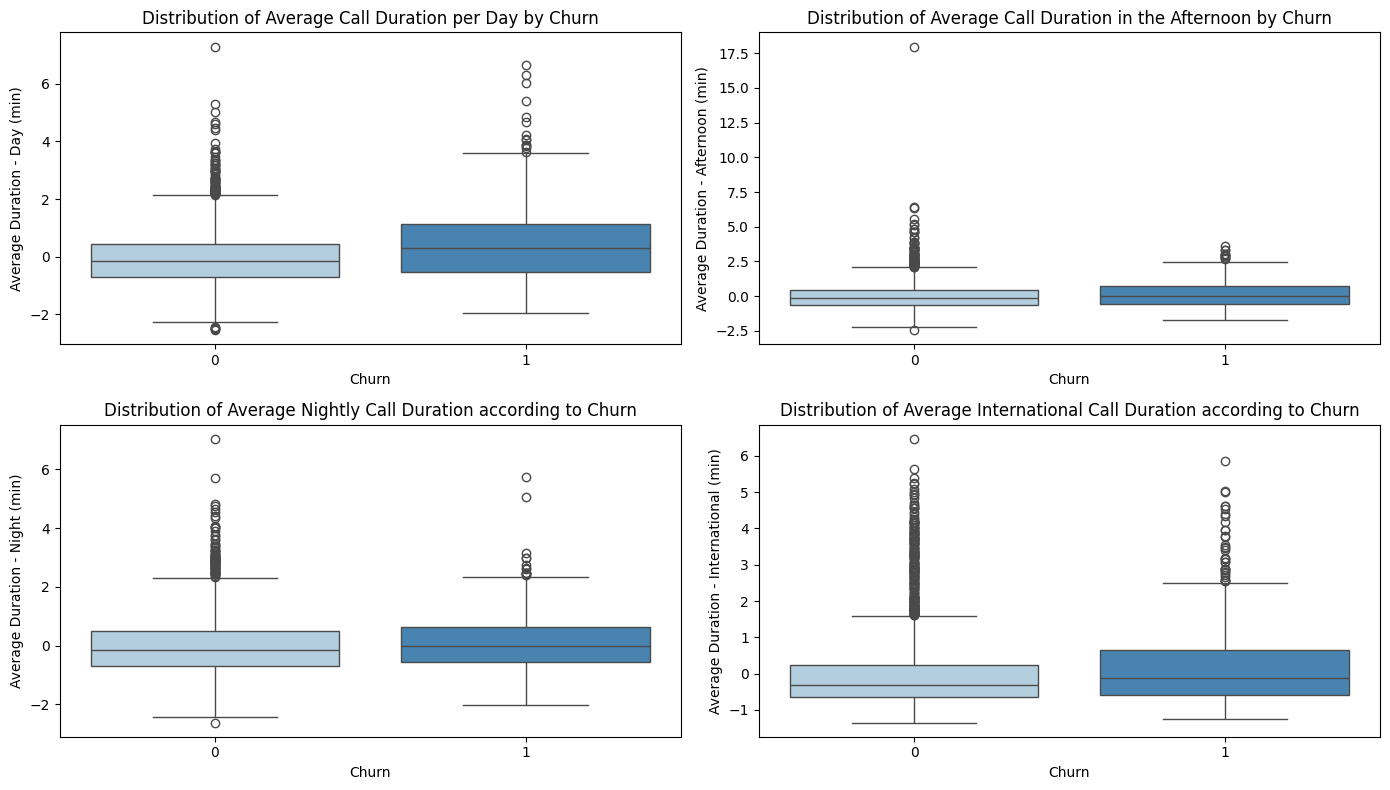

In [29]:
plt.figure(figsize=(14, 8))

#avg_day_call_duration
plt.subplot(2, 2, 1)
sns.boxplot(x='churn', y='avg_day_call_duration', data=df, palette='Blues')
plt.title("Distribution of Average Call Duration per Day by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Duration - Day (min)")

#avg_eve_call_duration
plt.subplot(2, 2, 2)
sns.boxplot(x='churn', y='avg_eve_call_duration', data=df, palette='Blues')
plt.title("Distribution of Average Call Duration in the Afternoon by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Duration - Afternoon (min)")

#avg_night_call_duration
plt.subplot(2, 2, 3)
sns.boxplot(x='churn', y='avg_night_call_duration', data=df, palette='Blues')
plt.title("Distribution of Average Nightly Call Duration according to Churn")
plt.xlabel("Churn")
plt.ylabel("Average Duration - Night (min)")

#avg_intl_call_duration
plt.subplot(2, 2, 4)
sns.boxplot(x='churn', y='avg_intl_call_duration', data=df, palette='Blues')
plt.title("Distribution of Average International Call Duration according to Churn")
plt.xlabel("Churn")
plt.ylabel("Average Duration - International (min)")

plt.tight_layout()
plt.show()

- **Distribution of average call duration per day by Churn:** Both groups have a similar average duration, but departing customers (Churn = 1) tend to have slightly longer calls. There are several outliers (points outside the box) in both groups, indicating that there are some very long calls that could be influencing the average.
- **Distribution of average call duration in the afternoon according to Churn:** The trend is similar to that of the daytime: departing customers tend to have slightly longer calls in the afternoon. There are also outliers in both groups, but they are more frequent in the departing group.
- **Distribution of average night call duration by Churn:** For night calls, the difference between the two groups is less marked. However, departing customers still have slightly longer calls on average.
- **Distribution of average international call duration by Churn:** For international calls, the difference between the two groups is more evident. Leaving customers tend to have much longer international calls on average.

In general,
- The length of calls, especially international calls, appears to be related to a customer's decision to stay or leave. Customers who leave tend to have longer calls, particularly during international hours.
- Variability in call duration is high in both groups. This suggests that there are factors other than duration that influence customers' decisions.
- International calls are an important factor to consider. The large difference in the duration of international calls between the two groups suggests that the policies or costs associated with international calls may be influencing customers' decisions.

Relationship of the variables 'total_minutes', 'total_calls' and 'total_charge' with churn.

<ipython-input-30-2a166c53eb49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_minutes', data=df, palette='coolwarm')
<ipython-input-30-2a166c53eb49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_calls', data=df, palette='coolwarm')
<ipython-input-30-2a166c53eb49>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charge', data=df, palette='coolwarm')


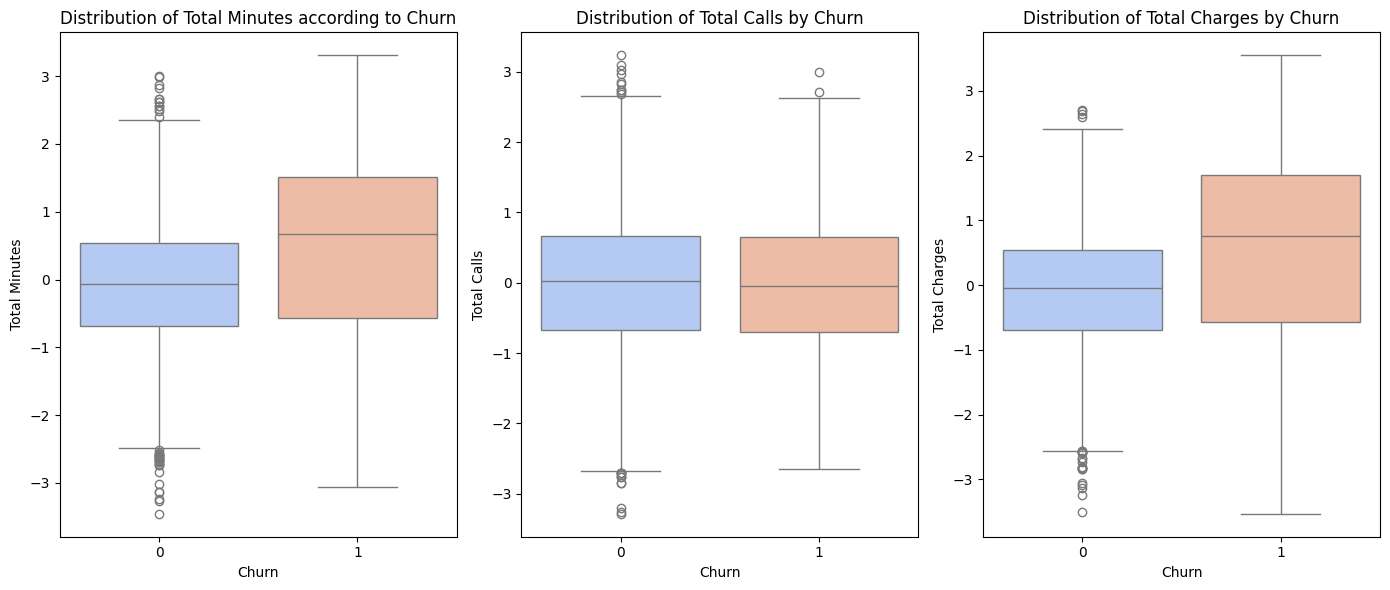

In [30]:
plt.figure(figsize=(14, 6))

#total_minutes
plt.subplot(1, 3, 1)
sns.boxplot(x='churn', y='total_minutes', data=df, palette='coolwarm')
plt.title("Distribution of Total Minutes according to Churn")
plt.xlabel("Churn")
plt.ylabel("Total Minutes")

#total_calls
plt.subplot(1, 3, 2)
sns.boxplot(x='churn', y='total_calls', data=df, palette='coolwarm')
plt.title("Distribution of Total Calls by Churn")
plt.xlabel("Churn")
plt.ylabel("Total Calls")

#total_charge
plt.subplot(1, 3, 3)
sns.boxplot(x='churn', y='total_charge', data=df, palette='coolwarm')
plt.title("Distribution of Total Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")

plt.tight_layout()
plt.show()

- **Distribution of total minutes according to Churn:** Customers who leave (Churn = 1) tend to use slightly more total minutes compared to those who stay (Churn = 0). The box (representing the interquartile range) is slightly wider for customers who leave, indicating greater dispersion in minutes used. There are several outliers (points outside the box) in both groups, but they are more frequent in the departing group.
- **Distribution of total calls by Churn:** As with minutes, departing customers tend to make slightly more total calls. The distribution of total calls is similar to that of minutes, with a greater dispersion in the departing group.
- **Distribution of total charges according to Churn:** The clearest trend is observed in total charges. Customers who leave have, on average, significantly higher total charges. The cash box for departing customers is notably higher, indicating that, in general, they spend more money on service.

In general,
- Customers who leave tend to use more minutes and make more calls. This suggests that the amount of service usage could be related to a customer's decision to stay or leave.
- Customers who leave generate more revenue. Despite using the service more, customers who leave also generate more revenue for the company. This could indicate that these customers are subscribing to more expensive plans or consuming additional services.
- There is great variability in customer behavior. Both stayers and leavers show a wide range of service usage and expenditures.

### Training Step

In [31]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 64)

For this study we will use LazyClassifier. This Python package will help us to know which models are the best for the data we are working with, without having to eat your head with exploratory analysis.

In [36]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train, X_test, y_train, y_test)

 13%|█▎        | 4/31 [00:03<00:17,  1.56it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 29%|██▉       | 9/31 [00:04<00:08,  2.71it/s]

FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


 68%|██████▊   | 21/31 [00:09<00:02,  4.80it/s]

NuSVC model failed to execute
specified nu is infeasible


 87%|████████▋ | 27/31 [00:12<00:01,  2.66it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'


 97%|█████████▋| 30/31 [00:13<00:00,  2.54it/s]

[LightGBM] [Info] Number of positive: 478, number of negative: 2922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3424
[LightGBM] [Info] Number of data points in the train set: 3400, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140588 -> initscore=-1.810413
[LightGBM] [Info] Start training from score -1.810413


100%|██████████| 31/31 [00:14<00:00,  2.16it/s]


In [37]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.97,0.90,0.90,0.97,0.55
BaggingClassifier,0.97,0.90,0.90,0.97,1.11
RandomForestClassifier,0.97,0.90,0.90,0.97,1.98
DecisionTreeClassifier,0.94,0.89,0.89,0.94,0.23
XGBClassifier,0.97,0.89,0.89,0.97,1.23
ExtraTreesClassifier,0.95,0.82,0.82,0.94,0.98
GaussianNB,0.85,0.80,0.80,0.86,0.04
AdaBoostClassifier,0.93,0.79,0.79,0.92,2.09
ExtraTreeClassifier,0.88,0.74,0.74,0.88,0.04


Analyzing the results we can observe that the LGBMClassifier, BaggingClassifier and RandomForestClassifier models coincide in the evaluation metrics and only differ in the training and prediction time. Overall, these results reflect robust and reliable classification models. Looking at these metrics in detail we have:
- **Accuracy (0.97):** Indicates the proportion of correct predictions over the total number of samples. In this case, the models have 97% overall accuracy, which is quite high. However, the overall accuracy can be misleading if there are unbalanced classes, as is the case here, since a model could obtain high accuracy by simply predicting the majority class.
- **Balanced Accuracy (0.90):** This indicator is especially useful if the classes are unbalanced. It calculates the average accuracy per class, taking into account the errors of both the positive and negative classes. A balanced accuracy of 90% indicates that the models handle both classes well, regardless of class balance.
- **ROC AUC (0.90):** The area under the ROC curve measures the model's ability to distinguish between classes. A value of 0.90 means that, on average, the model is able to assign a higher score to positive samples than to negative samples 90% of the time. This value suggests that the models have a good ability to separate classes.
- **F1 Score (0.97):** The F1 metric combines accuracy and recall, and is especially useful when there are unbalanced classes and it is necessary that the model not only gets it right (“precision”) but also identifies all positives (“recall”). An F1 score of 0.97 means that the models are achieving a good balance between these two aspects.

The following is the individual performance of the best model LGBMClassifier in the test.

In [38]:
import lightgbm as lgb

In [39]:
model_lgbm = lgb.LGBMClassifier(verbose=0)
model_lgbm.fit(X_train,y_train)

LGBMClassifier(verbose=0)

In [41]:
y_test_predicted = model_lgbm.predict(X_test)

The accuracy score is  97.52941176470588 %


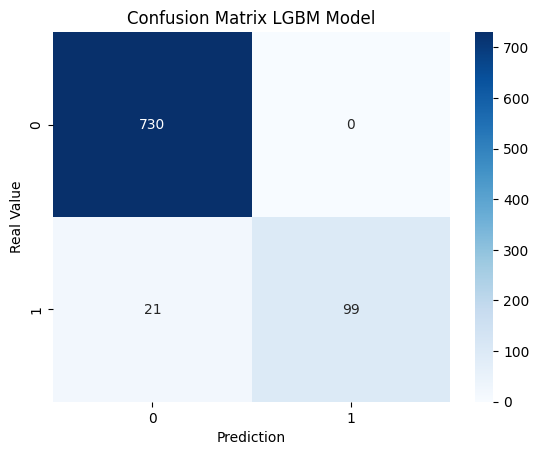

In [45]:
accuracy = metrics.accuracy_score(y_test,y_test_predicted)
print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix(y_test,y_test_predicted), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LGBM Model')
plt.ylabel('Real Value')
plt.xlabel('Prediction')
plt.show()

Save the model

In [47]:
model_lgbm.booster_.save_model('customer_churn_predictor_lgbm')